### t2.small, AWS Marketplace -> Anaconda with Python 3

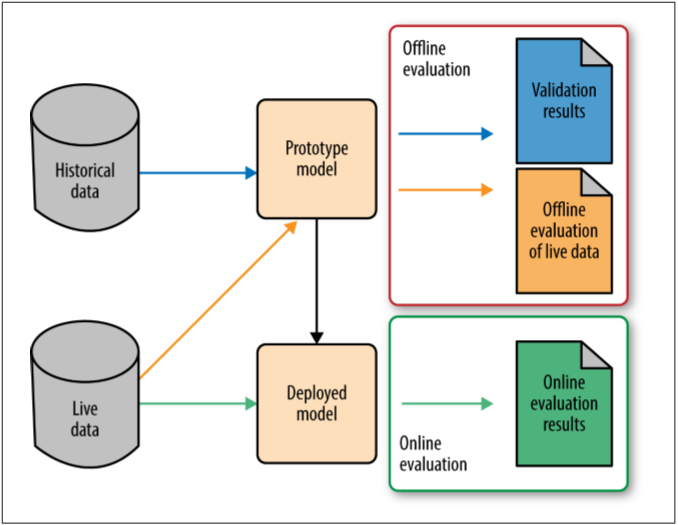

In [2]:
from IPython.display import Image
Image(filename='OnlineOfflineEvaluation.png')

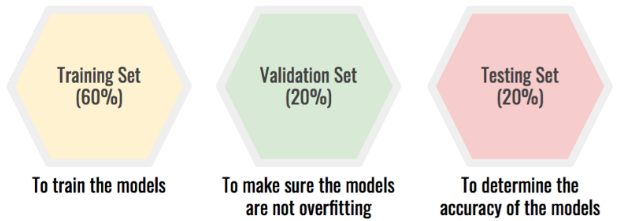

In [3]:
from IPython.display import Image
Image(filename='TrainingValidationTesting.png')

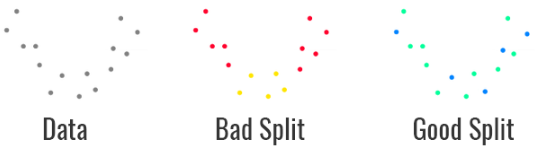

In [4]:
from IPython.display import Image
Image(filename='ShuffleDataToBalanceData.png')

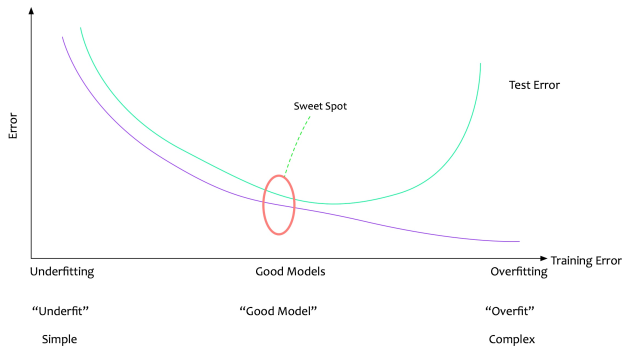

In [5]:
from IPython.display import Image
Image(filename='OptimalModel.png')

### 1) Accuracy

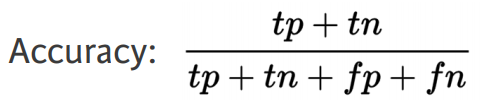

In [12]:
from IPython.display import Image
Image(filename='Accuracy.png')

### Accuracy Paradox

-  The accuracy paradox is the paradoxical finding that accuracy is not a good metric for predictive models when classifying in predictive analytics.
-  This is because a simple model may have a high level of accuracy but be too crude to be useful.
-  For example, if the incidence of category A is dominant, being found in 99% of cases, then predicting that every case is category A will have an accuracy of 99%.
-  Precision and recall are better measures in such cases.
-  The underlying issue is that class priors need to be accounted for in error analysis.
-  Precision and recall help, but precision too can be biased by very unbalanced class priors in the test sets.

### 2) Confusion Matrix

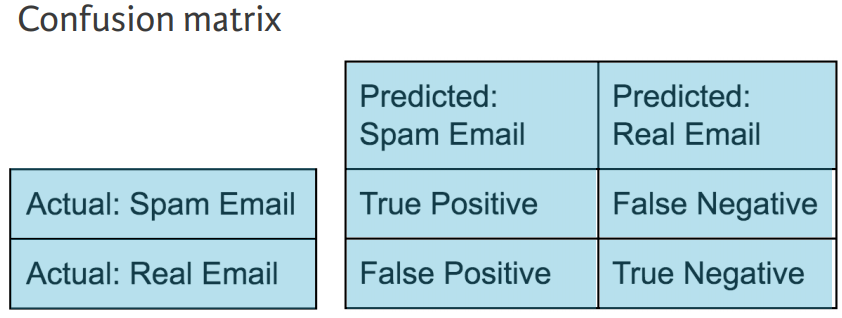

In [10]:
from IPython.display import Image
Image(filename='Confusion.png')

-  True positives : The model predicts an observation belongs to a class and it does.
-  True negatives : The model predicts an observation does not belong to a class and it does not.
-  False positives : The model predicts an observation belongs to a class when it does not.
-  False negatives : The model predicts an observation does not belong to a class when it does.

In [7]:
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix

y_true = ['rabbit', 'cat', 'rabbit', 'rabbit', 'cat',    'dog', 'dog', 'rabbit', 'rabbit', 'cat',    'dog', 'rabbit']
y_pred = ['cat'   , 'cat', 'rabbit',    'dog', 'cat', 'rabbit', 'dog',    'cat', 'rabbit', 'cat', 'rabbit', 'rabbit']

ConfusionMatrix(y_true, y_pred).plot(cmap=plt.cm.Blues)
plt.colorbar()

ModuleNotFoundError: No module named 'pandas_ml'

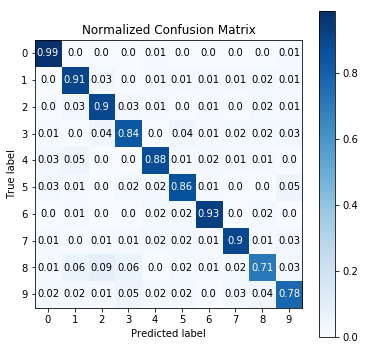

In [8]:
import scikitplot as skplt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

X, y        = load_digits(return_X_y=True)
predictions = cross_val_predict(RandomForestClassifier(n_estimators=5), X, y, cv=5)
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=predictions, normalize=True, figsize=(6,6))

### 3) Receiver Operating Characteristic

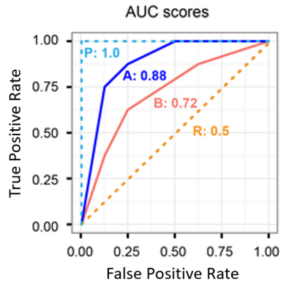

In [9]:
from IPython.display import Image
Image(filename='AUCScores.png')

-  A perfect machine learning model will have an AUC of 1.0 (cyan).
-  A random model will have an AUC of 0.5 (orange). 
-  A good model will be over 0.7.
-  A great model will be over 0.85. 
-  It is not possible to perfectly classify a data set, but the AUC is a good way to compare models and give a sense of how trustworthy the model is.

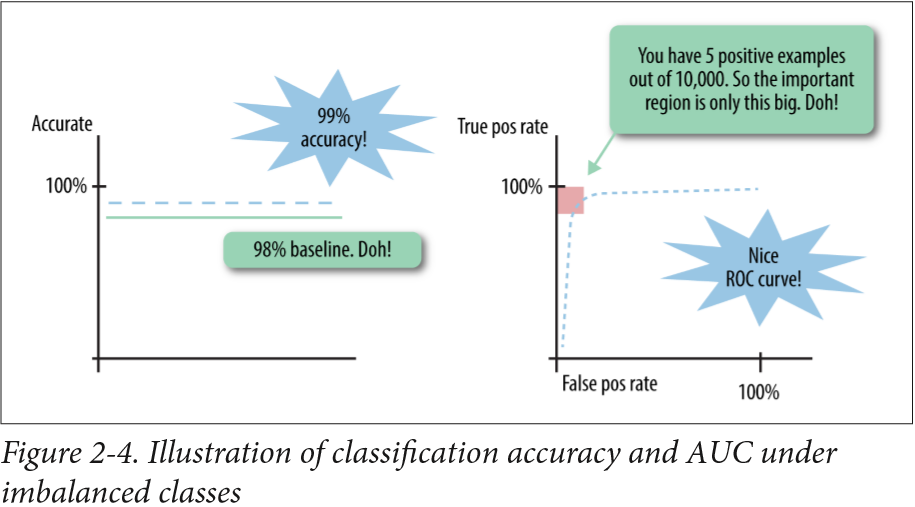

In [13]:
from IPython.display import Image
Image(filename='ImbalancedClasses.png')

Area Under Curve (summary of model skill): 0.681


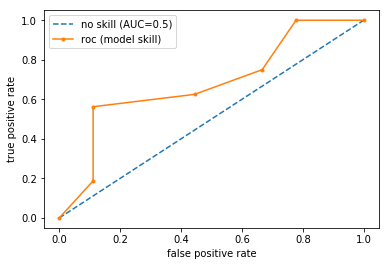

In [19]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

X, y = make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y)

probabilities = KNeighborsClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probabilities)

pyplot.plot([0, 1], linestyle='--',                              label='no skill (AUC=0.5)')
pyplot.plot(false_positive_rate, true_positive_rate, marker='.', label='roc (model skill)')
pyplot.xlabel('false positive rate')
pyplot.ylabel('true positive rate')
pyplot.legend()

print('Area Under Curve (summary of model skill): %.3f' % roc_auc_score(y_test, probabilities))

### 4) Precision-Recall Curve

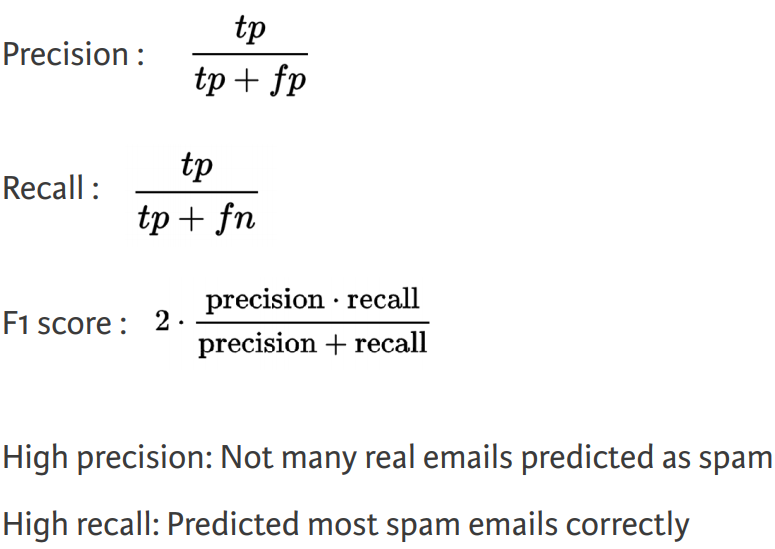

In [7]:
from IPython.display import Image
Image(filename='PrecisionRecallF1.png')

F-measure:            0.857
Area Under the Curve: 0.948
Average Precision:    0.922


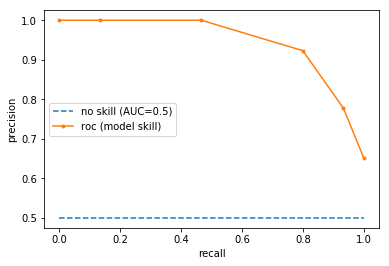

In [29]:
from matplotlib import pyplot
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y)

model         = KNeighborsClassifier().fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]
predictions   = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

pyplot.plot([0.5, 0.5], linestyle='--',    label='no skill (AUC=0.5)')
pyplot.plot(recall, precision, marker='.', label='roc (model skill)')
pyplot.xlabel('recall')
pyplot.ylabel('precision')
pyplot.legend()

print('F-measure:            %.3f' % (f1_score(y_test, predictions)))
print('Area Under the Curve: %.3f' % (auc(recall, precision)))
print('Average Precision:    %.3f' % (average_precision_score(y_test, probabilities)))

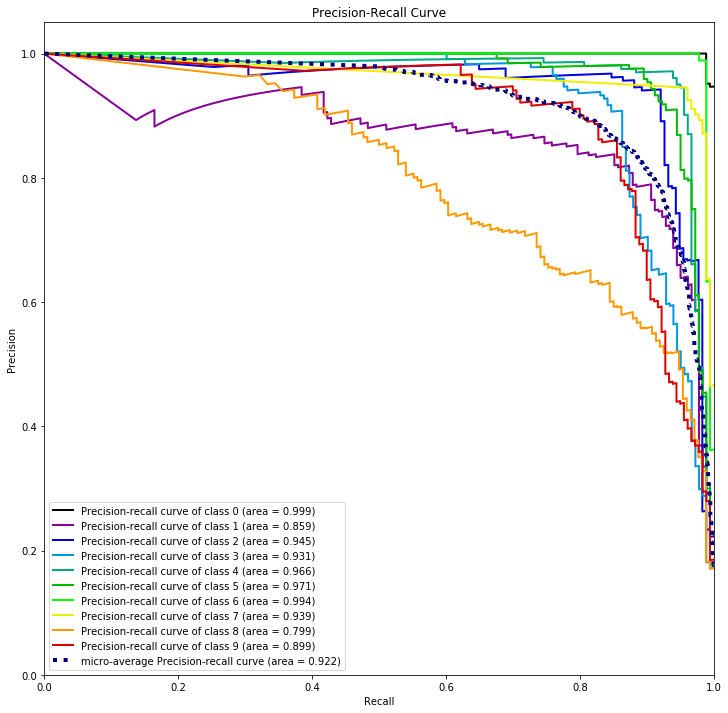

In [8]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data

X, y          = load_data(return_X_y=True)
probabilities = GaussianNB().fit(X, y).predict_proba(X)
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probabilities, figsize=(12,12))

### 5) Learning Curve

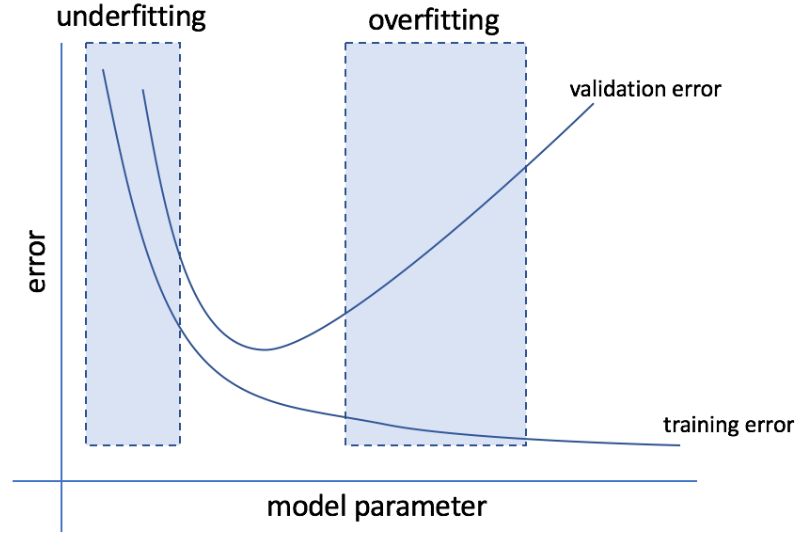

In [14]:
from IPython.display import Image
Image(filename='ValidationCurve_01.png')

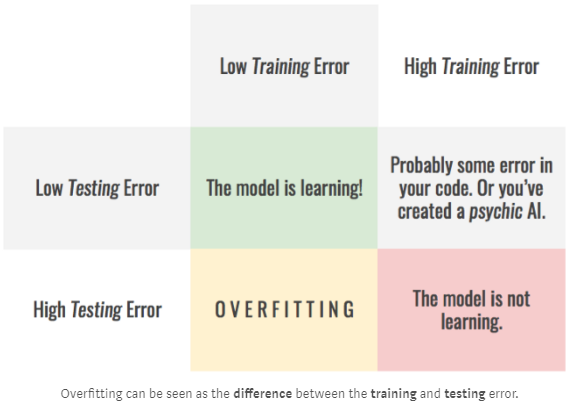

In [15]:
from IPython.display import Image
Image(filename='ValidationCurve_02.png')

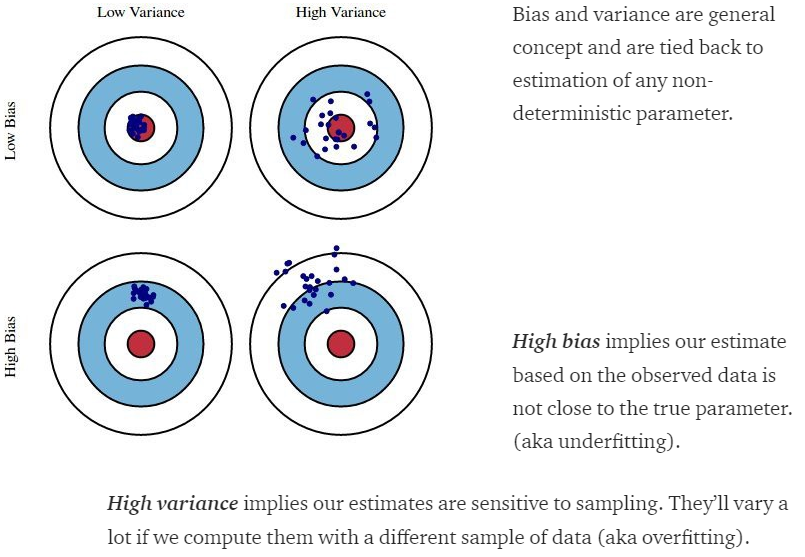

In [19]:
from IPython.display import Image
Image(filename='BiasVariance.png')

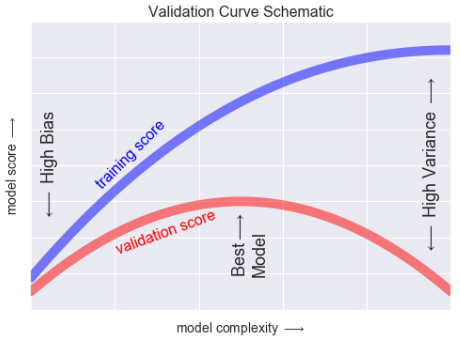

In [20]:
from IPython.display import Image
Image(filename='ValidationCurve_03.png')

-  The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
-  For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
-  For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
-  For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

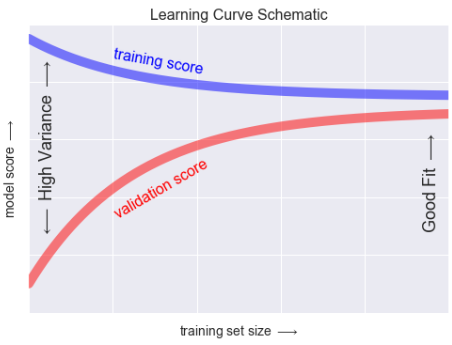

In [21]:
from IPython.display import Image
Image(filename='ValidationCurve_04.png')

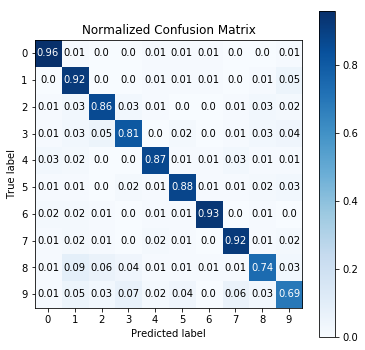

In [6]:
import scikitplot as skplt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

X, y        = load_digits(return_X_y=True)
predictions = cross_val_predict(RandomForestClassifier(n_estimators=5), X, y, cv=5)
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=predictions, normalize=True, figsize=(6,6))

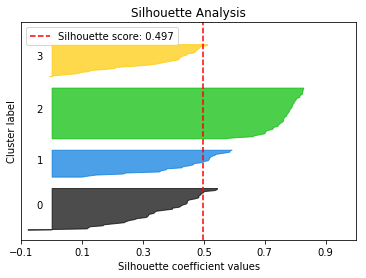

In [9]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris as load_data
import scikitplot as skplt

X, y = load_data(return_X_y=True)
kmeans = KMeans(n_clusters=4, random_state=1)
cluster_labels = kmeans.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels)
plt.show()

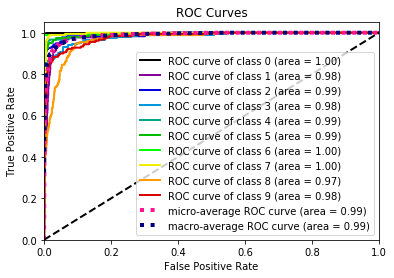

In [10]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_roc(y_true=y, y_probas=probas)
plt.show()

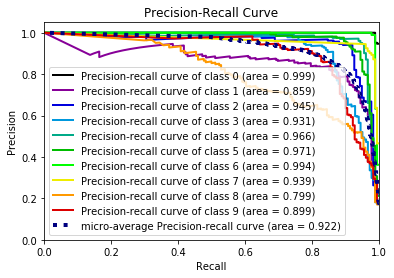

In [11]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)
plt.show()

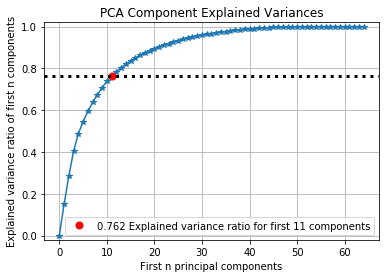

In [12]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits as load_data
import scikitplot as skplt
import matplotlib.pyplot as plt


X, y = load_data(return_X_y=True)
pca = PCA(random_state=1)
pca.fit(X)
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

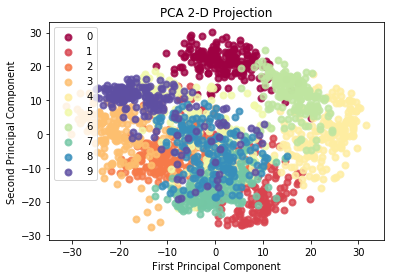

In [13]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits as load_data
import scikitplot as skplt
import matplotlib.pyplot as plt

X, y = load_data(return_X_y=True)
pca = PCA(random_state=1)
pca.fit(X)
skplt.decomposition.plot_pca_2d_projection(pca, X, y)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


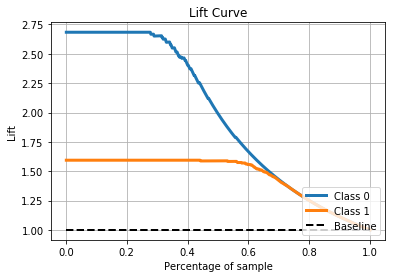

In [16]:
from __future__ import absolute_import
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_lift_curve(y_true=y, y_probas=probas)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn

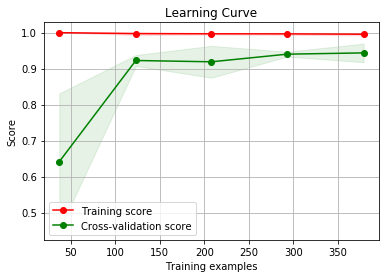

In [17]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
skplt.estimators.plot_learning_curve(rf, X, y)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


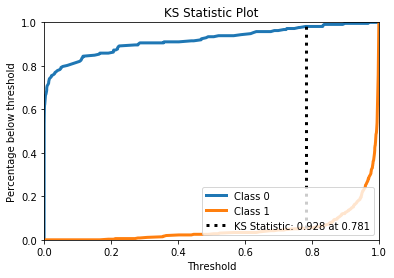

In [18]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_ks_statistic(y_true=y, y_probas=probas)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


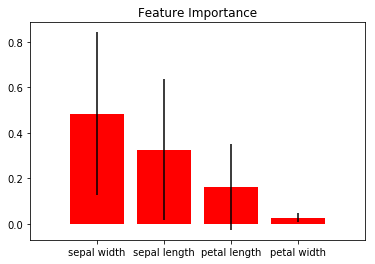

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris as load_data
import matplotlib.pyplot as plt
import scikitplot as skplt

X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
skplt.estimators.plot_feature_importances(rf,
                                          feature_names=['petal length',
                                                         'petal width',
                                                         'sepal length',
                                                         'sepal width'])
plt.show()

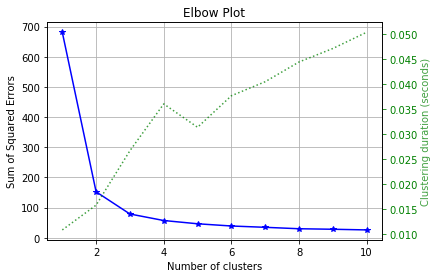

In [20]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris as load_data


X, y = load_data(return_X_y=True)
kmeans = KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 11))
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


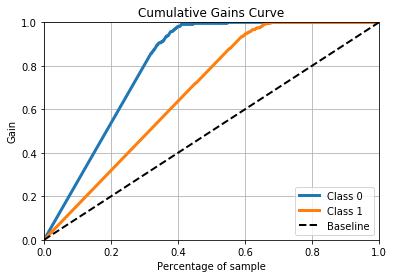

In [21]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X, y = load_data(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_cumulative_gain(y_true=y, y_probas=probas)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


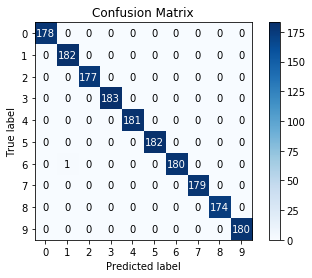

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits as load_data
import matplotlib.pyplot as plt
import scikitplot as skplt

X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
preds = rf.predict(X)
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=preds)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


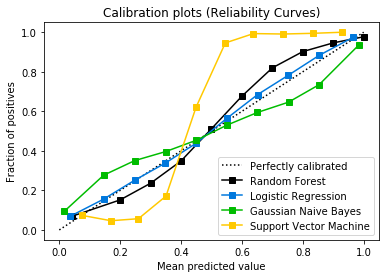

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import scikitplot as skplt

X, y = make_classification(n_samples=100000, n_features=20,
                           n_informative=2, n_redundant=2,
                           random_state=20)

X_train, y_train, X_test, y_test = X[:1000], y[:1000], X[1000:], y[1000:]

rf_probas = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_test)
sv_scores = LinearSVC().fit(X_train, y_train).decision_function(X_test)

probas_list = [rf_probas, lr_probas, nb_probas, sv_scores]
clf_names=['Random Forest',
           'Logistic Regression',
           'Gaussian Naive Bayes',
           'Support Vector Machine']

skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list=probas_list,
                                     clf_names=clf_names,
                                     n_bins=10)
plt.show()